# <center> Discriminant Functions </center>
---
## Introduction

Discriminant Analysis is a statistical tool with an objective to assess the adequacy of a
classification, given the group memberships; or to assign objects to one group among a
number of groups. Discriminant analysis is used when groups are known a priori. Each
case must have a score on one or more quantitative predictor measures, and a score on a
group measure. In simple terms, discriminant function analysis is classification - the act of
distributing things into groups, classes or categories of the same type. Here, we are going
to use gaussian function as discriminant.

## Importing required Libraries 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image

## Reading Data & Plotting

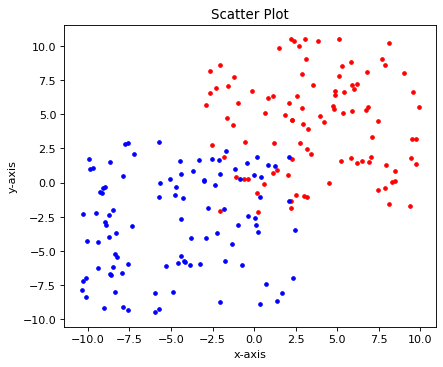

In [2]:
dataset = np.genfromtxt("Dataset.csv",delimiter=',')
data = dataset[:,:-1]
label = dataset[:,-1]
labels = np.unique(label)
cov = np.cov(data.T)
X_p = np.array([data[i] for i in range(len(label)) if label[i] == labels[0]])
X_n = np.array([data[i] for i in range(len(label)) if label[i] == labels[1]])
plt.figure(figsize=(6,5),dpi=80)
plt.scatter(X_p[:,0],X_p[:,1],s=10,c='r')
plt.scatter(X_n[:,0],X_n[:,1],s=10,c='b')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Scatter Plot")
plt.show()

In [3]:
cov

array([[31.3853628 , 16.11495767],
       [16.11495767, 25.93148128]])

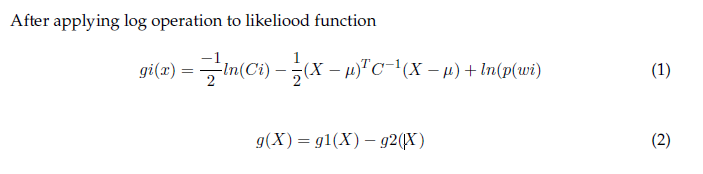

In [4]:
Image("discriminant_function.png")

## Processing data

In [5]:
#calculating Covariance Matrix
def cov_m(data):
    return np.cov(data.T)
#calculating Mean Vector
def mean(data):
    return np.mean(data.T,axis=1)

## case (i)

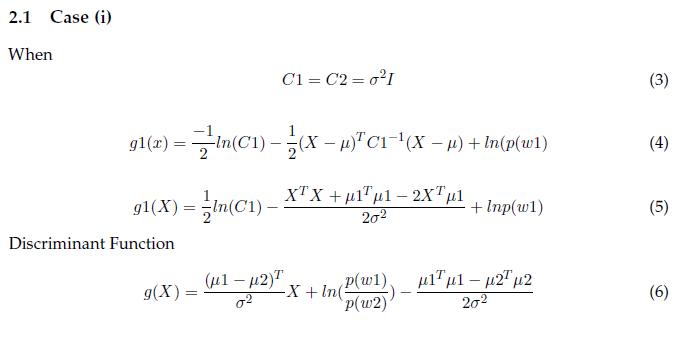

In [6]:
Image("case1.png")

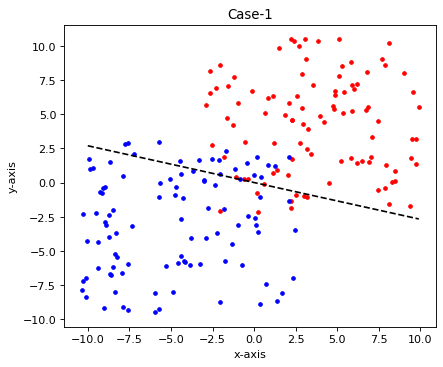

In [7]:
c = np.zeros([2,2])
c[0][0] = cov[0][0]
c[1][1] = cov[0][0]
m1 = mean(X_p).T
m2 = mean(X_n).T

W1 = (m1-m2)/cov[0][0]
b1 = -0.5*(np.dot(m1.T,m1)-np.dot(m2.T,m2))/cov[0][0]

def boundary1(x2):
    return -W1[0]*x2+b1

x1 = np.arange(-10,10,0.1)
x2 = [boundary1(i) for i in x1]
plt.figure(figsize=(6,5),dpi=80)
plt.scatter(X_p[:,0],X_p[:,1],s=10,c='r')
plt.scatter(X_n[:,0],X_n[:,1],s=10,c='b')
plt.plot(x1,x2,'k--')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Case-1")
plt.show()

## case (ii)

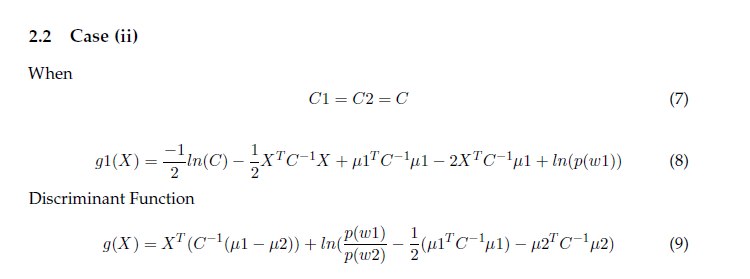

In [8]:
Image("case2.png")

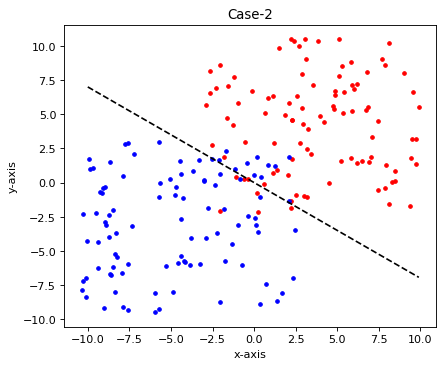

In [9]:
c2 = cov_m(X_p)
W2 = (np.dot(np.linalg.inv(c2),(m1-m2)))
b2 = -0.5*(np.dot(np.dot(m1.T,np.linalg.inv(c2)),m1)-np.dot(np.dot(m2.T,np.linalg.inv(c2)),m2))

def boundary2(x2):
    return -W2[0]*x2+b2

x1 = np.arange(-10,10,0.1)
x2 = [boundary2(i) for i in x1]
plt.figure(figsize=(6,5),dpi=80)
plt.scatter(X_p[:,0],X_p[:,1],s=10,c='r')
plt.scatter(X_n[:,0],X_n[:,1],s=10,c='b')
plt.plot(x1,x2,'k--')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Case-2")
plt.show()

## case (iii)

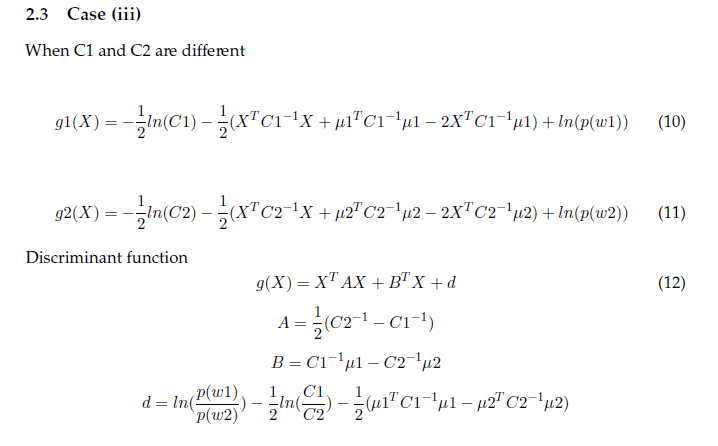

In [10]:
Image("case3.png")

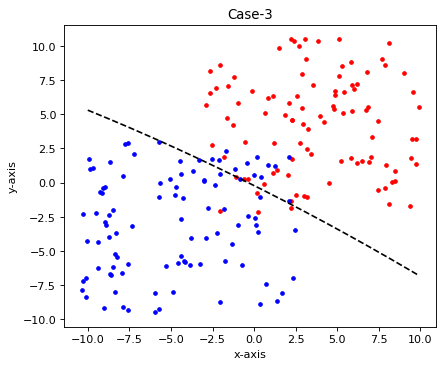

In [11]:
c1_inv = np.linalg.inv(cov_m(X_p))
c2_inv = np.linalg.inv(cov_m(X_n))
A = 0.5*(c2_inv-c1_inv)
B = (np.dot(c1_inv,m1)-np.dot(c2_inv,m2))
det_c1 = np.linalg.det(cov_m(X_p))
det_c2 = np.linalg.det(cov_m(X_n))
d = -0.5*((np.log(det_c1/det_c2))+(np.dot(m1.T,np.dot(c1_inv,m1)))-np.dot(m2.T,np.dot(c2_inv,m2)))

def boundary3(x2_3):
    return A[0,0]*x2_3**2-B[0]*x2_3+d

x1_3 = np.arange(-10,10,0.1)
x2 = [boundary3(i) for i in x1_3]
plt.figure(figsize=(6,5),dpi=80)
plt.scatter(X_p[:,0],X_p[:,1],s=10,c='r')
plt.scatter(X_n[:,0],X_n[:,1],s=10,c='b')
plt.plot(x1_3,x2,'k--')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Case-3")
plt.show()